Epoch 0: 1771929006.5333333
Epoch 1: 188203963.73958334
Epoch 2: 147192132.14804688
Epoch 3: 141810077.01380208
Epoch 4: 138845952.2375
Epoch 5: 136157339.540625
Epoch 6: 133553917.82604167
Epoch 7: 131016829.3828125
Epoch 8: 128542831.98802084
Epoch 9: 126130291.66145833
Epoch 10: 123777583.2421875
Epoch 11: 121483414.66946615
Epoch 12: 119246125.2072759
Epoch 13: 117064498.96142578
Epoch 14: 114936987.2453125
Epoch 15: 112862439.21484375
Epoch 16: 110839434.459375
Epoch 17: 108866648.23333333
Epoch 18: 106943005.83541666
Epoch 19: 105067186.03958334
Epoch 20: 103238007.28229167
Epoch 21: 101454369.86223958
Epoch 22: 99715096.70859376
Epoch 23: 98019116.53515625
Epoch 24: 96365369.33286133
Epoch 25: 94752797.63776906
Epoch 26: 93180387.6516276
Epoch 27: 91647142.58802083
Epoch 28: 90152147.4141927
Epoch 29: 88694415.43385416
Epoch 30: 87272989.94527994
Epoch 31: 85886959.10203451
Epoch 32: 84535541.07402344
Epoch 33: 83217849.69762573
Epoch 34: 81932995.85952148
Epoch 35: 80680256.031

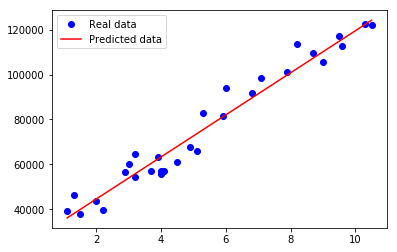

In [2]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'Data/Salary_Data.xlsx'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
	
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
    total_loss_prev = 0
	# Step 8: train the model
    for i in range(1000): # train the model 100 epochs

        total_loss = 0
        for x, y in data:
			# Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        
        if abs(total_loss/n_samples - total_loss_prev/n_samples) <= 0.00001*(total_loss_prev/n_samples) :
            break
        
        total_loss_prev = total_loss
        
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
    writer.close() 
	
	# Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()